In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, r2_score, max_error, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hour.csv')

#df.isnull().sum()
#df.columns
#df.describe()
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


<AxesSubplot:>

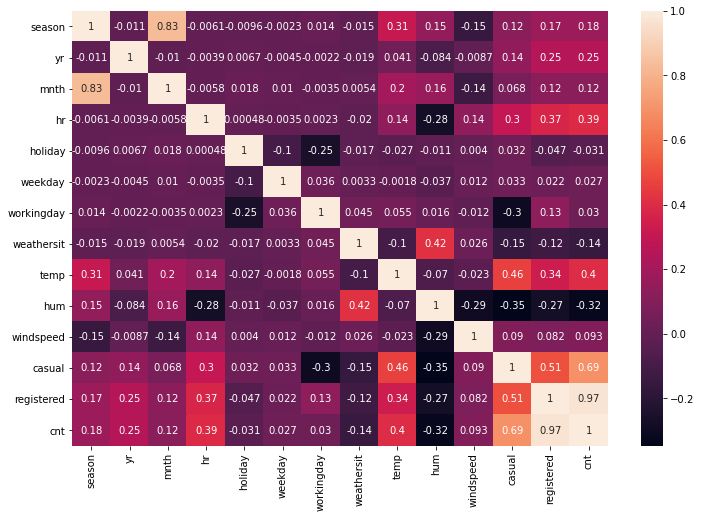

In [9]:
# Numeric columns of the dataset
numeric_col = ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Correlation Matrix formation
corr_matrix = df.loc[:,numeric_col].corr()
#print(corr_matrix)

#Using heatmap to visualize the correlation matrix
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot=True)

In [11]:
df2 = df.drop(['instant', 'mnth', 'dteday', 'yr', 'atemp', 'casual', 'registered'], axis = 1)

df2.season = df2.season.astype('category')
df2.holiday = df2.holiday.astype('category')
df2.weekday = df2.weekday.astype('category')
df2.workingday = df2.workingday.astype('category')
df2.weathersit = df2.weathersit.astype('category')

df2 = pd.get_dummies(df2)

In [12]:
df2.columns

Index(['hr', 'temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2',
       'season_3', 'season_4', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [13]:
X = df2.copy()
X = X.drop(['cnt'], axis = 1)
y = df2['cnt']
y = np.array(y)

In [14]:
# Scaling
#X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [15]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)

print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_dt_prediction)))
print('Mean_squared_error: ', str(mean_squared_error(y_test,model_dt_prediction)))
r2_dt = r2_score(y_test, model_dt_prediction)
print('The r2 value is: ' + str(r2_dt))

Mean_absolute_error:  65.72359033371691
Mean_squared_error:  11146.137399309551
The r2 value is: 0.6652267073233632


<AxesSubplot:>

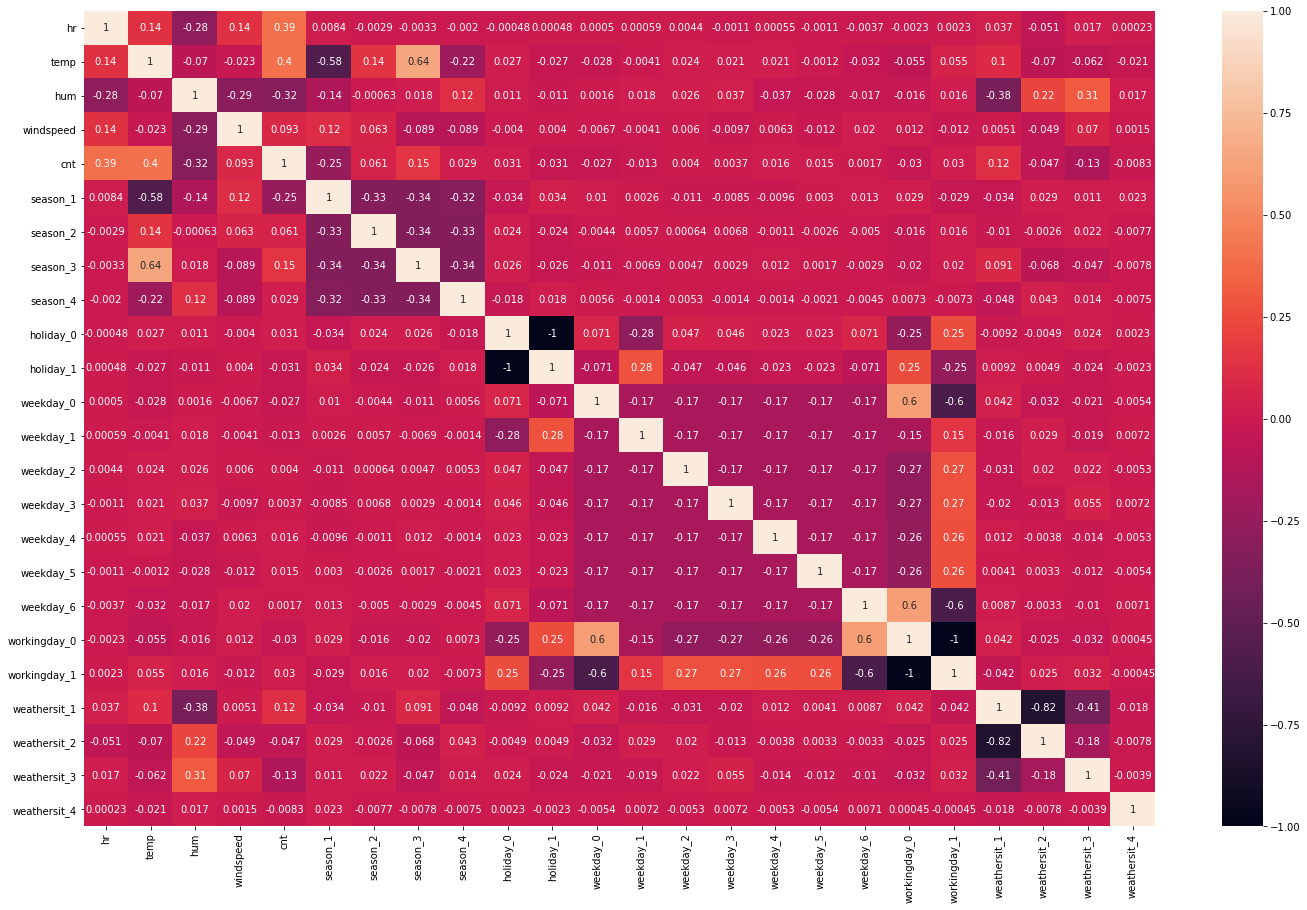

In [18]:
# Correlation matrix on dummie dataset
num_col = ['hr', 'temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']

# Correlation Matrix formation
corr_matrix = df2.loc[:,num_col].corr()
#print(corr_matrix)

#Using heatmap to visualize the correlation matrix
plt.figure(figsize = (24,15))
sns.heatmap(corr_matrix, annot=True)

Mean:  0.02140561411867468


<AxesSubplot:>

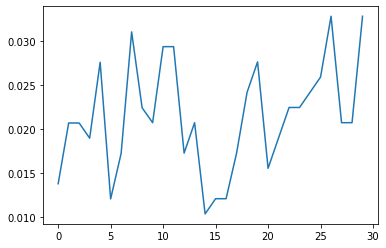

In [27]:
# K-Fold DecisionTree
dt_plot = cross_val_score(tree.DecisionTreeClassifier(max_depth = 300), X, y, cv=30)
print('Mean: ', dt_plot.mean())
dt_plot = pd.Series(dt_plot)
dt_plot.plot()

In [29]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)

print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_knn_prediction)))
print('Mean_squared_error: ', str(mean_squared_error(y_test,model_knn_prediction)))
r2_knn = r2_score(y_test, model_knn_prediction)
print('The r2 value is: ' + str(r2_knn))

Mean_absolute_error:  64.98365937859609
Mean_squared_error:  10809.112082853855
The r2 value is: 0.6753492341560441


In [39]:
# model_svm = SVC(kernel='linear').fit(X_train, y_train)
# model_svm_prediction = model_svm.predict(X_test)
# print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_svm_prediction)))
# print('Mean_squared_error: ', str(mean_squared_error(y_test,model_svm_prediction)))
# r2_svm = r2_score(y_test, model_svm_prediction)
# print('The r2 value is: ' + str(r2_svm))

In [40]:
# model_svm2 = SVC(kernel='poly').fit(X_train, y_train)
# model_svm2_prediction = model_svm2.predict(X_test)

# print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_svm2_prediction)))
# print('Mean_squared_error: ', str(mean_squared_error(y_test,model_svm2_prediction)))
# r2_svm2 = r2_score(y_test, model_svm2_prediction)
# print('The r2 value is: ' + str(r2_svm2))

In [41]:
# model_svm3 = SVC(kernel='rbf').fit(X_train, y_train)
# model_svm3_prediction = model_svm3.predict(X_test)

# print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_svm3_prediction)))
# print('Mean_squared_error: ', str(mean_squared_error(y_test,model_svm3_prediction)))
# r2_svm3 = r2_score(y_test, model_svm3_prediction)
# print('The r2 value is: ' + str(r2_svm3))

In [37]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)

print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_rf_prediction)))
print('Mean_squared_error: ', str(mean_squared_error(y_test,model_rf_prediction)))
r2_rf = r2_score(y_test, model_rf_prediction)
print('The r2 value is: ' + str(r2_rf))

Mean_absolute_error:  74.71116225546605
Mean_squared_error:  15294.260529344074
The r2 value is: 0.5406381804713798


In [32]:
# AdaBoostRegressor
model_ada = AdaBoostRegressor().fit(X_train,y_train)
model_ada_prediction = model_ada.predict(X_test)

print('Mean_absolute_error: ', str(mean_absolute_error(y_test, model_ada_prediction)))
print('Mean_squared_error: ', str(mean_squared_error(y_test,model_ada_prediction)))
r2_ada = r2_score(y_test, model_ada_prediction)
print('The r2 value is: ' + str(r2_ada))

Mean_absolute_error:  84.27710928036215
Mean_squared_error:  12099.875035193554
The r2 value is: 0.6365812782140561


<AxesSubplot:>

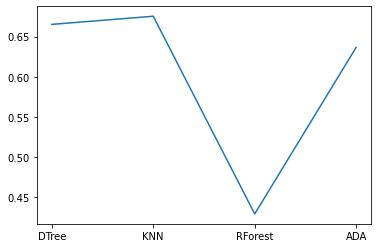

In [34]:
r2 = [r2_dt, r2_knn, r2_rf, r2_ada]
r2 = pd.Series(r2)

exploration_methods = ['DTree', 'KNN', 'RForest', 'ADA']
plt.xticks(np.arange(4) , exploration_methods, rotation = '45')
r2.plot()

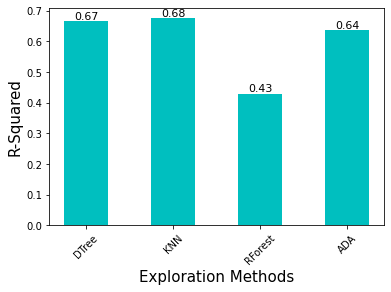

In [36]:
plt.bar(x=exploration_methods, height = r2, color = 'c', width = 0.5)
#plt.grid()
#plt.title('R-Squared')
plt.xlabel('Exploration Methods', fontsize=15)
plt.ylabel('R-Squared', fontsize=15)
plt.xticks(rotation=45)
#plt.ylim(0, 0.1)

for i in range(4):
  plt.text(
      x = i, 
      y = r2[i], 
      s = round(r2[i], 2), 
      horizontalalignment='center',
      verticalalignment='bottom',
      size = 11)

plt.show()